In [1]:
import pandas as pd

# Citirea datelor din fișierul CSV
df = pd.read_csv('modifycars.csv')

# Explorarea datelor
print(df.head())  # Primele 5 rânduri
print(df.info())  # Informații despre date (tipuri de date, valori lipsă)
print(df.describe())  # Statistici descriptive


      Price  Mileage  Cylinder  Doors  Cruise  Sound  Leather  Buick  \
0  22661.05    20105         6    4.0       1      0        0      1   
1  21725.01    13457         6    2.0       1      1        0      0   
2  29142.71    31655         4    2.0       1      1        1      0   
3  30731.94    22479         4    2.0       1      0        0      0   
4  33358.77    17590         4    2.0       1      1        1      0   

   Cadillac  Chevy  Pontiac  Saab  Saturn  convertible  coupe  hatchback  \
0         0      0        0     0       0            0      0          0   
1         0      1        0     0       0            0      1          0   
2         0      0        0     1       0            1      0          0   
3         0      0        0     1       0            1      0          0   
4         0      0        0     1       0            1      0          0   

   sedan  wagon  
0      1      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  
<c

In [2]:
# Exemplu de gestionare a valorilor lipsă
df = df.dropna()  # Eliminarea rândurilor cu valori lipsă
# Sau
# df = df.fillna(df.mean())  # Înlocuirea valorilor lipsă cu media coloanei

# Exemplu de codificare a variabilelor categorice
df = pd.get_dummies(df, drop_first=True)

# Exemplu de normalizare
from sklearn.preprocessing import StandardScaler

# Separarea caracteristicilor (X) și a etichetei (y)
X = df.drop('Price', axis=1)  # 'target' este coloana pe care vrei să o prezici
y = df['Price']

# Normalizarea caracteristicilor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transformarea înapoi într-un DataFrame Pandas
X = pd.DataFrame(X_scaled, columns=X.columns)


In [3]:
from sklearn.model_selection import train_test_split

# Împărțirea datelor în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression

# Crearea modelului
model = LinearRegression()

# Antrenarea modelului
model.fit(X_train, y_train)


LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Prezicerea pe setul de testare
y_pred = model.predict(X_test)

# Evaluarea modelului
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 8836903.199142698
R^2 Score: 0.9238973161576036


In [6]:
import pandas as pd
from scipy.stats import entropy
import numpy as np

# Citirea datelor din fișierul CSV
df = pd.read_csv('modifycars.csv')

# Funcția de calculare a entropiei
def calculate_entropy(y):
    probabilities = y.value_counts(normalize=True)
    return entropy(probabilities, base=2)

# Calcularea entropiei pentru coloana 'target'
ent = calculate_entropy(df['Price'])
print(f"Entropy: {ent}")

# Calcularea entropiei maxime
num_categories = len(df['Price'].unique())
max_entropy = np.log2(num_categories)
print(f"Maximum Entropy: {max_entropy}")

# Interpreting the entropy value
if ent < max_entropy / 2:
    print("The entropy is low, indicating low uncertainty or impurity.")
elif ent < max_entropy:
    print("The entropy is moderate.")
else:
    print("The entropy is high, indicating high uncertainty or impurity.")


Entropy: 9.636126318044603
Maximum Entropy: 9.640244936222345
The entropy is moderate.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('modifycars.csv')
def gini_index(y):
    value_counts = y.value_counts(normalize=True)
    gini = 1 - sum(value_counts ** 2)
    return gini

# Calcularea indicelui Gini pentru coloana 'target'
gini = gini_index(df['Price'])
print(f"Gini Index: {gini}")


Gini Index: 0.9987376550085394


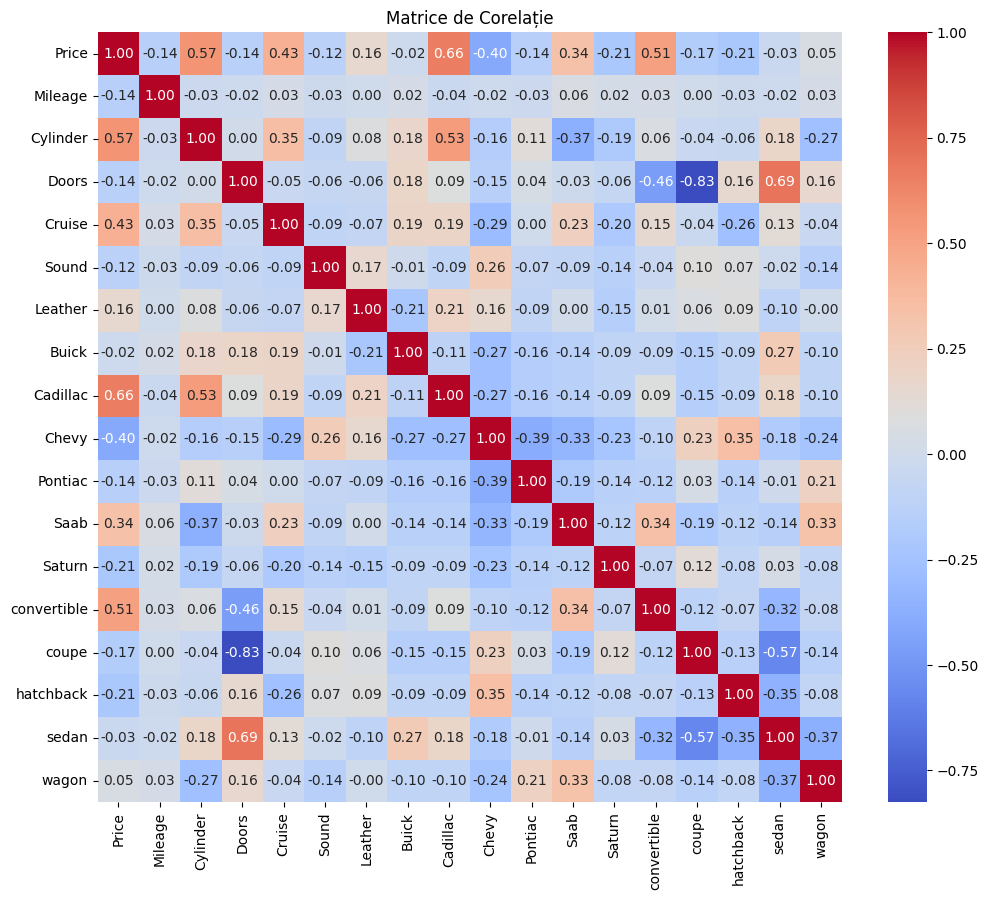

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculăm matricea de corelație pentru dataframe-ul df
correlation_matrix = df.corr()

# Vizualizăm matricea de corelație sub formă de hartă de căldură
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corelație')
plt.show()


In [ ]:
import numpy as np

# Definirea unei distribuții de probabilitate
probabilities = np.array([0.2, 0.3, 0.1, 0.4])

# Calculul entropiei
entropy = -np.sum(probabilities * np.log2(probabilities))
print("Entropy:", entropy)


Entropy: 1.8464393446710154


In [18]:
import numpy as np
import pandas as pd

# Definirea funcției calculate_information_quantity pentru a calcula informația cantitativă
def calculate_information_quantity(X):
    # Numărul total de instanțe în setul de date
    total_instances = X.shape[0]
    
    # Calculul informației cantitative pentru fiecare caracteristică
    information_quantities = []
    for feature_column in X.T:
        unique_values, value_counts = np.unique(feature_column, return_counts=True)
        probabilities = value_counts / total_instances
        information_quantity = np.sum(probabilities * np.log2(1 / probabilities))
        information_quantities.append(information_quantity)
    
    return information_quantities

# Încărcarea datelor din fișierul CSV într-un dataframe pandas
df = pd.read_csv('modifycars.csv')

# Eliminarea coloanei 'Price' din dataframe pentru a rămâne doar cu caracteristicile
X = df.drop(columns=['Price']).values

# Calculul Information Quantity pentru fiecare caracteristică
information_quantities = calculate_information_quantity(X)

# Afișarea informației cantitative pentru fiecare caracteristică
for i, quantity in enumerate(information_quantities):
    print(f"Information Quantity for feature {df.columns[i]}: {quantity}")


Information Quantity for feature Price: 9.617774467917531
Information Quantity for feature Mileage: 1.4084240773999506
Information Quantity for feature Cylinder: 0.7888641281936422
Information Quantity for feature Doors: 0.8073115724647868
Information Quantity for feature Cruise: 0.9053526478438055
Information Quantity for feature Sound: 0.8501091888128283
Information Quantity for feature Leather: 0.46741652968734937
Information Quantity for feature Buick: 0.46741652968734937
Information Quantity for feature Cadillac: 0.9697745802276105
Information Quantity for feature Chevy: 0.6942347416140926
Information Quantity for feature Pontiac: 0.5889102455769419
Information Quantity for feature Saab: 0.38295767227235333
Information Quantity for feature Saturn: 0.33607404529172824
Information Quantity for feature convertible: 0.6670643717925439
Information Quantity for feature coupe: 0.38295767227235333
Information Quantity for feature hatchback: 0.9651518090107316
Information Quantity for feat

In [ ]:
from scipy.special import kl_div

# Definirea a două distribuții de probabilitate
P = np.array([0.2, 0.3, 0.1, 0.4])
Q = np.array([0.3, 0.2, 0.2, 0.3])

# Calculul divergenței Kullback-Leibler de la P la Q
kl_divergence = np.sum(kl_div(P, Q))
print("KL Divergence:", kl_divergence)


KL Divergence: 0.0863046217355343


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crearea modelului
random_forest_model = RandomForestRegressor()

# Antrenarea modelului
random_forest_model.fit(X_train, y_train)

# Predictie
predictions = random_forest_model.predict(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Crearea modelului
knn_model = KNeighborsRegressor(n_neighbors=5)  # Setăm numărul de vecini la 5, poți ajusta acest parametru

# Antrenarea modelului
knn_model.fit(X_train, y_train)

# Predictie
predictions = knn_model.predict(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Crearea modelului de regresie liniară
linear_regression_model = LinearRegression()

# Antrenarea modelului
linear_regression_model.fit(X_train, y_train)

# Predictie
predictions = linear_regression_model.predict(X_test)



In [ ]:
from sklearn.model_selection import GridSearchCV

# Definirea grilei de hiperparametri pentru Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Numărul de arbori în ansamblu
    'max_depth': [None, 10, 20],  # Adâncimea maximă a fiecărui arbore
    'min_samples_split': [2, 5, 10],  # Numărul minim de eșantioane necesare pentru a diviza un nod intern
    'min_samples_leaf': [1, 2, 4]  # Numărul minim de eșantioane necesare pentru a fi într-un nod frunză
}

# Inițializarea modelului Random Forest
random_forest_model = RandomForestRegressor()

# Inițializarea căutării pe grilă
grid_search_rf = GridSearchCV(estimator=random_forest_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Potrivirea modelului pentru datele de antrenare
grid_search_rf.fit(X_train, y_train)

# Afișarea celor mai buni hiperparametri găsiți
print("Cei mai buni hiperparametri pentru Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Cei mai buni hiperparametri pentru Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.linear_model import LinearRegression

# Crearea modelului de regresie liniară cu ajustarea interceptării
linear_regression_model = LinearRegression(fit_intercept=True)

# Antrenarea modelului
linear_regression_model.fit(X_train, y_train)

# Predictie
predictions = linear_regression_model.predict(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definirea grilei de hiperparametri pentru KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Numărul de vecini
    'weights': ['uniform', 'distance'],  # Ponderea vecinilor (uniformă sau în funcție de distanță)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algoritmul folosit pentru calculul vecinilor
}

# Inițializarea modelului KNN
knn_model = KNeighborsRegressor()

# Inițializarea căutării pe grilă
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Potrivirea modelului pentru datele de antrenare
grid_search_knn.fit(X_train, y_train)

# Afișarea celor mai buni hiperparametri găsiți
print("Cei mai buni hiperparametri pentru KNN:", grid_search_knn.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Cei mai buni hiperparametri pentru KNN: {'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluarea modelului Random Forest
predictions_rf = grid_search_rf.best_estimator_.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, predictions_rf)

print("Performanța modelului Random Forest:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

# Evaluarea modelului de Regresie Liniară
predictions_lr = linear_regression_model.predict(X_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, predictions_lr)

print("\nPerformanța modelului de Regresie Liniară:")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

# Evaluarea modelului KNN
predictions_knn = grid_search_knn.best_estimator_.predict(X_test)
mse_knn = mean_squared_error(y_test, predictions_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, predictions_knn)

print("\nPerformanța modelului KNN:")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("R-squared:", r2_knn)


Performanța modelului Random Forest:
Mean Squared Error: 4928653.185050551
Root Mean Squared Error: 2220.057022927688
R-squared: 0.9575548439698751

Performanța modelului de Regresie Liniară:
Mean Squared Error: 8836903.199142698
Root Mean Squared Error: 2972.692920424627
R-squared: 0.9238973161576036

Performanța modelului KNN:
Mean Squared Error: 6150876.614173068
Root Mean Squared Error: 2480.096089705612
R-squared: 0.947029156280968


In [ ]:
from sklearn.model_selection import cross_val_score

# Calcularea scorului de precizie folosind validarea încrucișată pentru Random Forest
scores_rf = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print("Precizia modelului Random Forest:", scores_rf.mean())

# Calcularea scorului de precizie folosind validarea încrucișată pentru Regresie Liniară
scores_lr = cross_val_score(linear_regression_model, X_train, y_train, cv=5, scoring='r2')
print("Precizia modelului de Regresie Liniară:", scores_lr.mean())

# Calcularea scorului de precizie folosind validarea încrucișată pentru KNN
scores_knn = cross_val_score(grid_search_knn.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print("Precizia modelului KNN:", scores_knn.mean())


Precizia modelului Random Forest: 0.9421685613828169
Precizia modelului de Regresie Liniară: 0.9050979643021865
Precizia modelului KNN: 0.9246331501044619


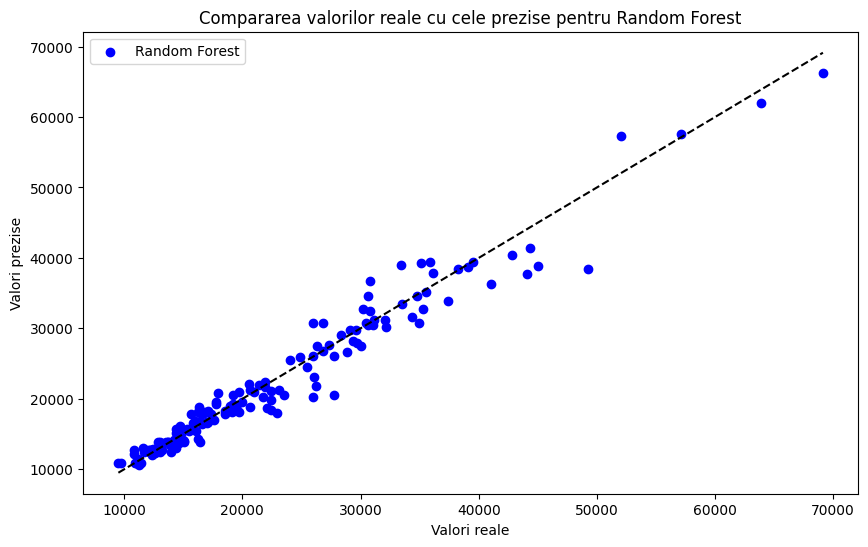

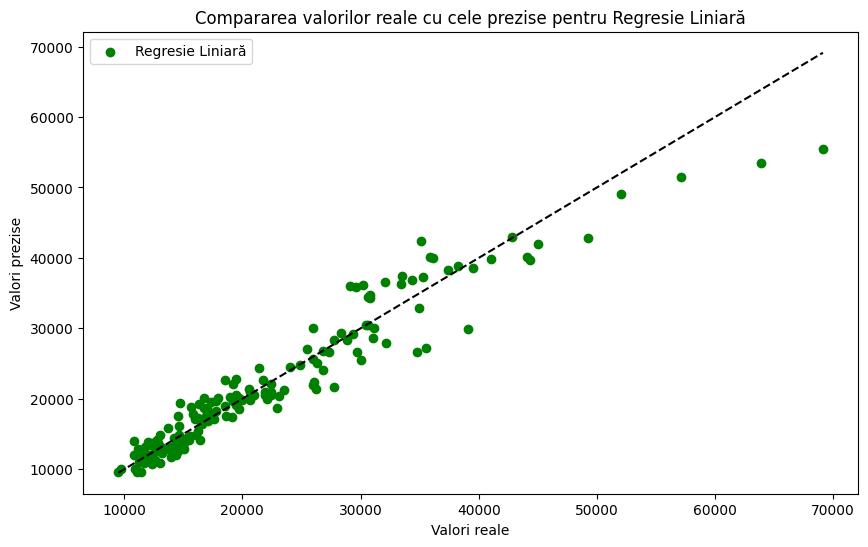

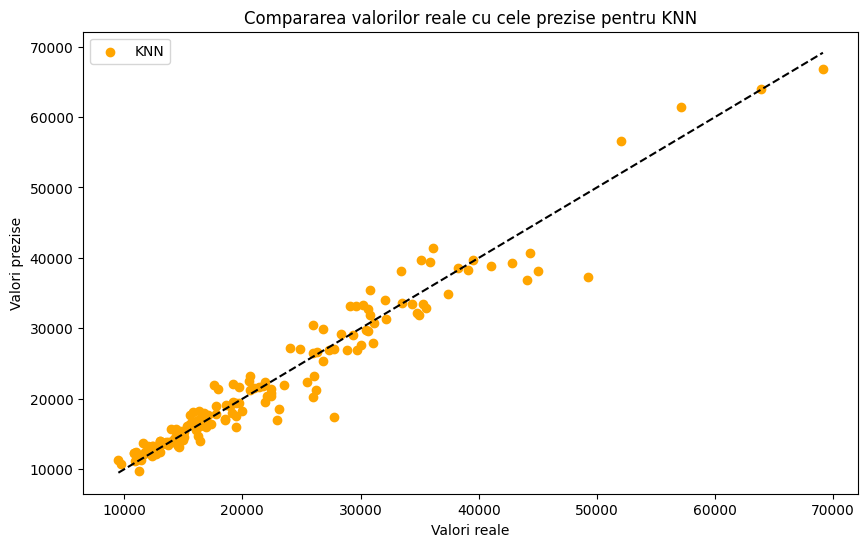

In [ ]:
# Calcularea predicțiilor pentru fiecare algoritm
predictions_rf = grid_search_rf.best_estimator_.predict(X_test)
predictions_lr = linear_regression_model.predict(X_test)
predictions_knn = grid_search_knn.best_estimator_.predict(X_test)

# Plotează graficul pentru Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_rf, color='blue', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.title('Compararea valorilor reale cu cele prezise pentru Random Forest')
plt.legend()
plt.show()

# Plotează graficul pentru Regresia Liniară
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lr, color='green', label='Regresie Liniară')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.title('Compararea valorilor reale cu cele prezise pentru Regresie Liniară')
plt.legend()
plt.show()

# Plotează graficul pentru KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_knn, color='orange', label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.title('Compararea valorilor reale cu cele prezise pentru KNN')
plt.legend()
plt.show()
